In [1]:
import pandas as pd
import json

% matplotlib inline

In [2]:
base_folder = 'C:/Users/jjd/Desktop/CryptoQuateTrade/'

In [3]:
def read_charts_from_Lean_backtest_output(json_file_path, chart_name):
    with open(json_file_path) as json_data:
        raw_data = json.load(json_data)['Charts'][chart_name]['Series']
    df = pd.DataFrame()
    for series in raw_data.keys():
        tmp_df = pd.DataFrame(raw_data[series]['Values']).set_index('x')
        if df.shape[1]==0:
            df = tmp_df
        else:
            df = pd.concat([df, tmp_df], axis=1)
    df.columns = raw_data.keys()
    return df.set_index(pd.to_datetime(df.index, unit='s'))

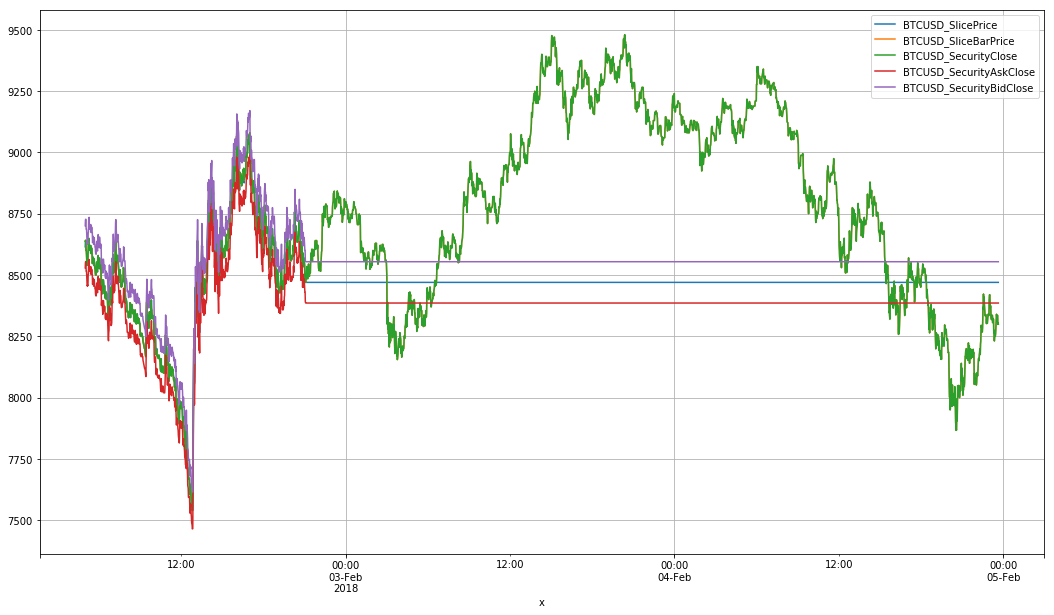

In [4]:
chart_name = 'BTCUSD_Price'
json_file_path = base_folder + 'base_case_starting_02-feb_ff-true.json'
df_alt = read_charts_from_Lean_backtest_output(json_file_path, chart_name)
df_alt.plot(grid=True, figsize=(18,10));

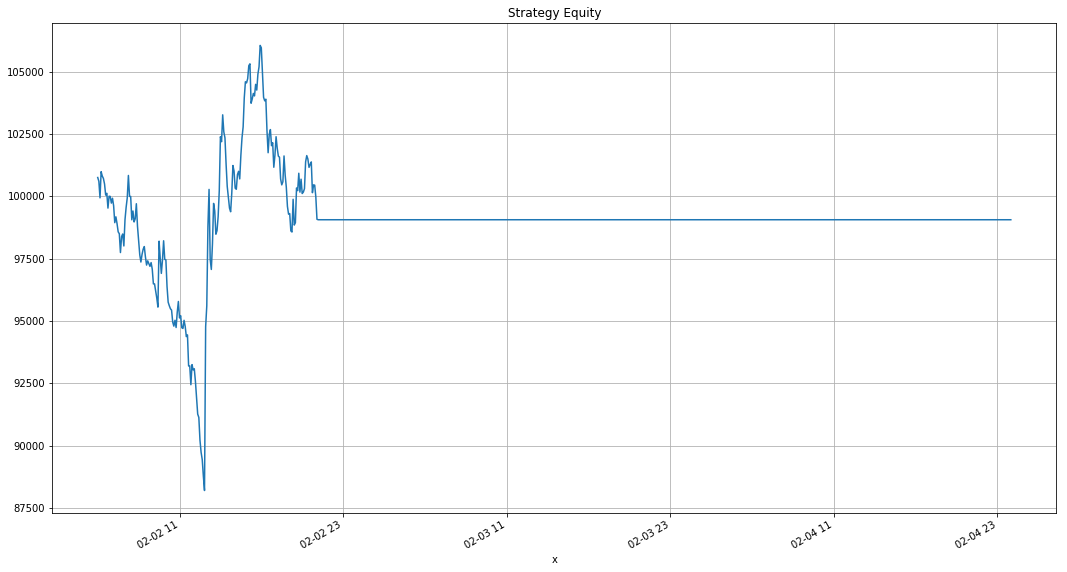

In [5]:
df_eq = read_charts_from_Lean_backtest_output(json_file_path, 'Strategy Equity')
df_eq.loc[:'2018-02-04','Equity'].plot(grid=True, figsize=(18,10), title='Strategy Equity');

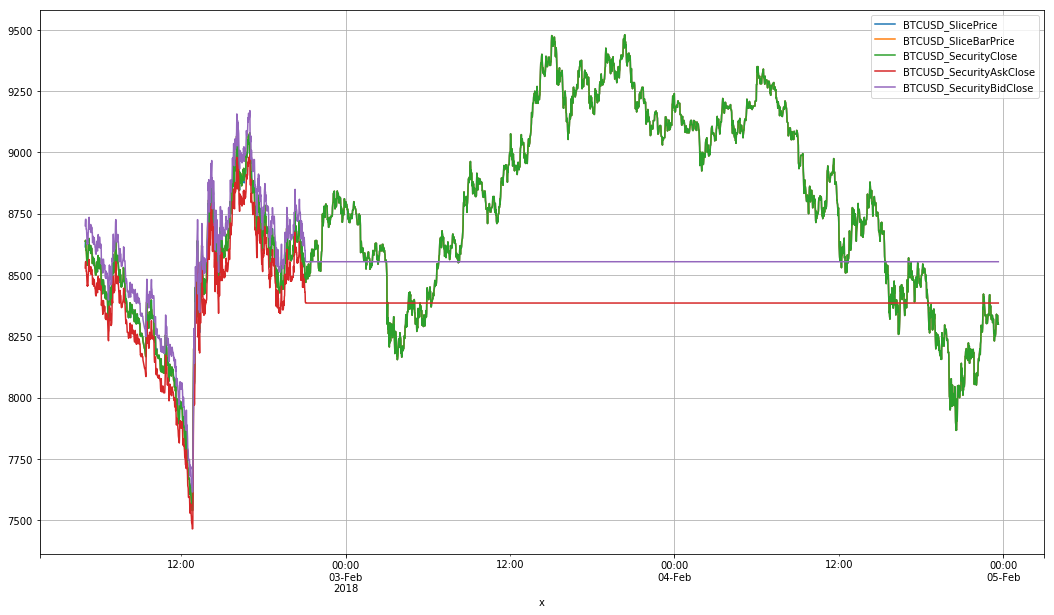

In [6]:
json_file_path = base_folder + 'BasicTemplateCryptoAlgorithm (10).json'
df_alt = read_charts_from_Lean_backtest_output(json_file_path, chart_name)
df_alt.plot(grid=True, figsize=(18,10));

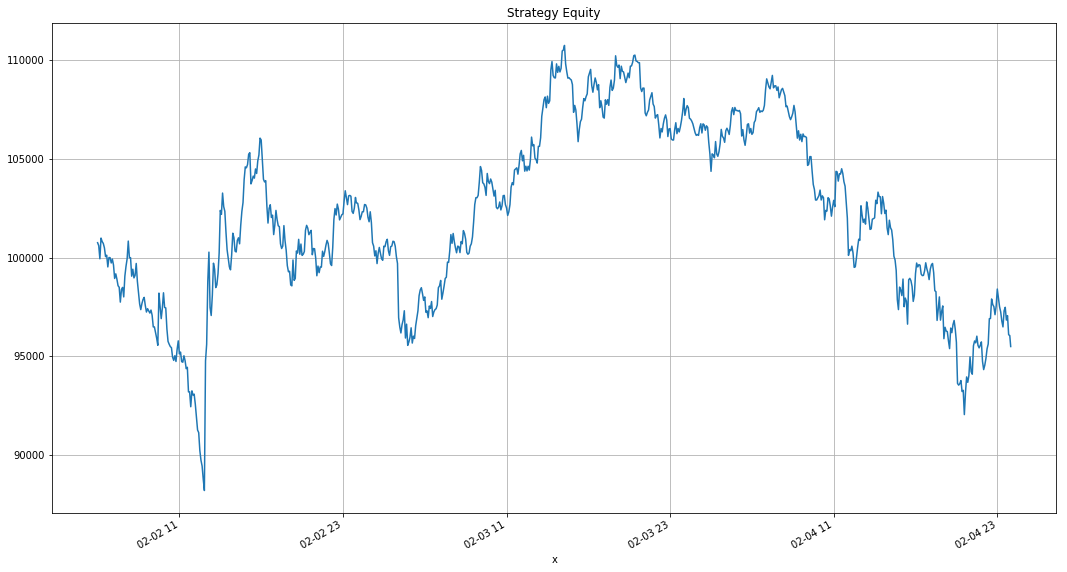

In [7]:
df_eq = read_charts_from_Lean_backtest_output(json_file_path, 'Strategy Equity')
df_eq.loc[:'2018-02-04','Equity'].plot(grid=True, figsize=(18,10), title='Strategy Equity');

In [8]:
price_vs_equity = pd.DataFrame({'Equity':df_eq.loc[:'2018-02-04','Equity'], 'Price':df_alt.BTCUSD_SecurityClose})

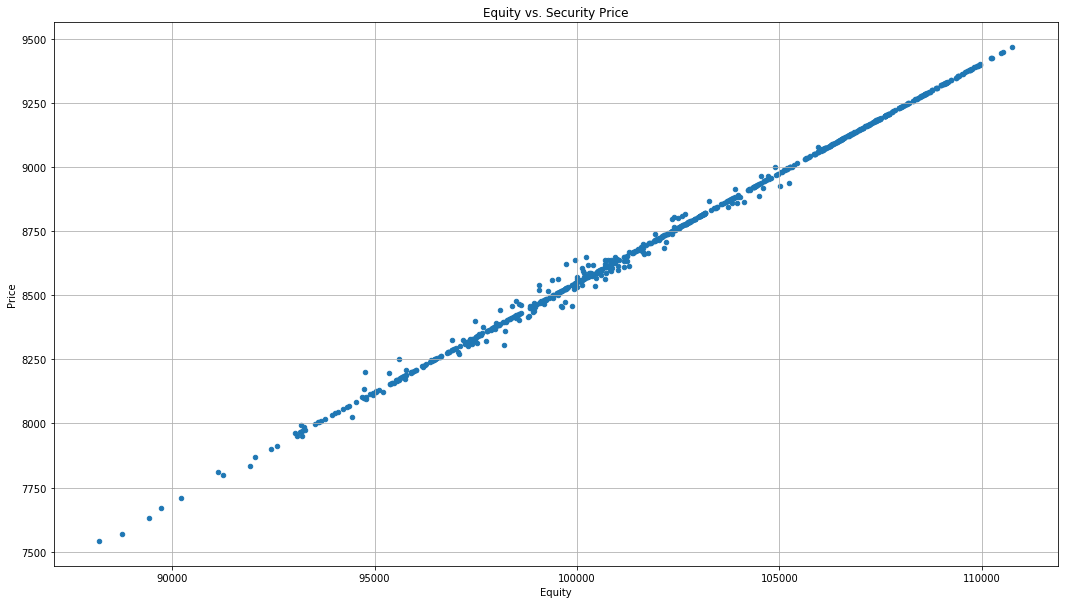

In [9]:
price_vs_equity.plot.scatter(x='Equity', y='Price', grid=True, figsize=(18,10),
                                                  title='Equity vs. Security Price')

In [10]:
price_vs_equity.corr(method='pearson')

,Equity,Price
Equity,1.000000,0.999263
Price,0.999263,1.000000


The values above are not 1 becasue they are estimatede using the quotes.

Here we need to confrim that the equity is correctly estimated using as fill price the Security Close, we can use the the data since the 2018-02-03

In [11]:
price_vs_equity.loc['2018-02-03':,:].corr(method='pearson')

,Equity,Price
Equity,1.0,1.0
Price,1.0,1.0
